# Resale HDB Price Analytics


[Overview](#Overview)

[DBSS](#DBSS)

[Newly MOP HDB Units](#Newly_MOP_HDB_Units)

In [19]:
import os, sys
import re, json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from glob import glob

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',500)

from utils import *
from viz import *

%load_ext autoreload
%autoreload 2

In [2]:
latest_file = [x for x in glob('./output_latest/*.xlsx') if '~' not in x][-1]
latest_file

'./output_latest\\HDB_resale_prices_2022-02-03.xlsx'

In [3]:
hdb = pd.read_excel(latest_file)

In [4]:
hdb.head()

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year
0,AMK,Ang Mo Kio,323,Ang Mo Kio Ave 3,07 to 09,44.00Improved,44.0,Improved,2-Room,1977,54 years 5 months,"$245,000.00",Jan 2022,Jan,2022
1,AMK,Ang Mo Kio,314,Ang Mo Kio Ave 3,07 to 09,44.00Improved,44.0,Improved,2-Room,1978,55 years 1 month,"$245,000.00",Dec 2021,Dec,2021
2,AMK,Ang Mo Kio,116,Ang Mo Kio Ave 4,07 to 09,44.00Improved,44.0,Improved,2-Room,1978,55 years 7 months,"$250,000.00",Nov 2021,Nov,2021
3,AMK,Ang Mo Kio,510,Ang Mo Kio Ave 8,01 to 03,44.00Improved,44.0,Improved,2-Room,1980,57 years 8 months,"$230,000.00",Oct 2021,Oct,2021
4,AMK,Ang Mo Kio,406,Ang Mo Kio Ave 10,04 to 06,44.00Improved,44.0,Improved,2-Room,1979,56 years 9 months,"$233,000.00",Sep 2021,Sep,2021


In [6]:
hdb = preprocessHDBdf(hdb)

In [7]:
hdb.shape

(29057, 24)

In [8]:
hdb.columns

Index(['Town Code', 'Town', 'Block', 'Street', 'Storey',
       'Floor Area/Flat Model', 'Floor Area', 'Flat Model', 'Flat Type',
       'Lease Commencement Date', 'Remaining Lease', 'Price',
       'Resale Registration Date', 'Resale Registration Month',
       'Resale Registration Year', 'Remaining Lease (Year)',
       'Remaining Lease (Month)', 'Remaining Lease in Months', 'Sqm', 'Sqft',
       'Price per Sqm', 'Price per Sqft',
       'Price per Sqft per Remaining Lease year', 'Storey Range + Flat Type'],
      dtype='object')

<a id='Overview'>Overview</a>

In [9]:
hdb['Resale Registration Year'].unique()

array([2021, 2022], dtype=int64)

In [10]:
n_months = len(hdb['Resale Registration Month'].unique())

## Resale Volume

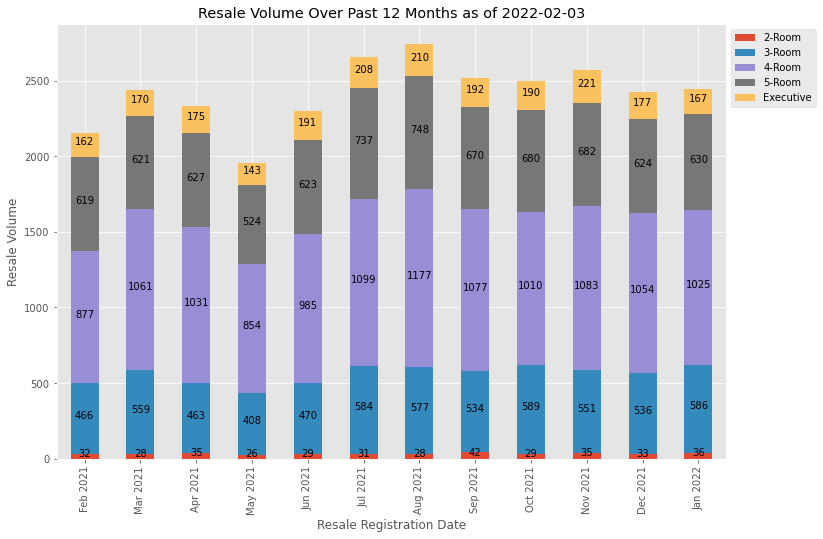

In [21]:
show_past_n_months_resale_volume(hdb, n_months)

## Total Resale Volume by Town

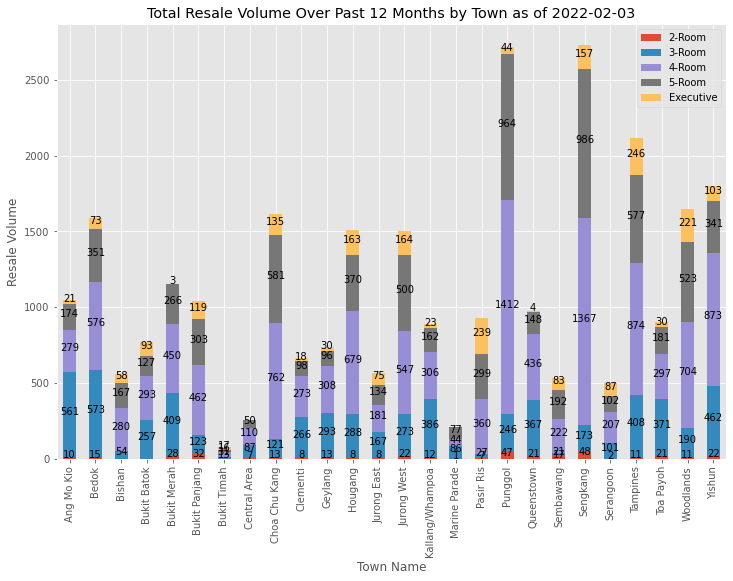

In [23]:
show_resale_volume_by_town(hdb, n_months)

## Price Distribution

[('min', 248.9), ('max', 1198.7), ('mean', 491.6), ('stddev', 121.6), ('median', 460.3), ('skew', 3.4), ('kurtosis', 1.7)]


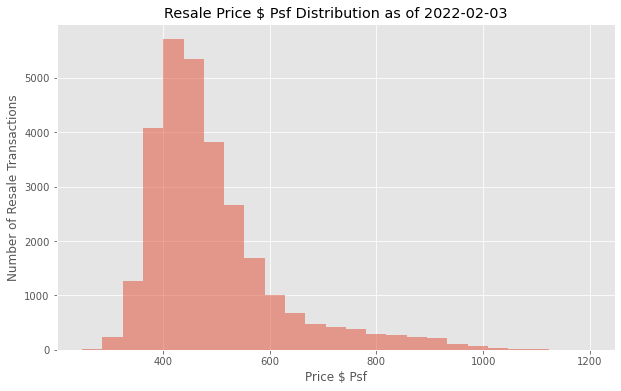

In [49]:
show_price_distribution(hdb)

E:\Geekout\sg-property-scrapers-and-analysis\scrape-resale-prices\HDB\viz.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,(hdb.shape[0]+1)/hdb.shape[0]*100, round(1/8*100)))


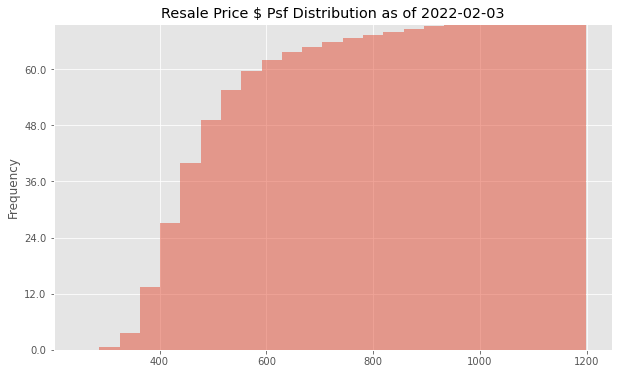

In [51]:
show_price_cumulative_distribution(hdb)

## Top 5 Most Expensive Resale HDBs for 4-Room and larger HDBs

In [15]:
hdb['Price rank room type'] = hdb.groupby('Flat Type')['Price'].rank(ascending=False)

hdb[(hdb['Price rank room type']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type
6349,CT,Central Area,1B,Cantonment Rd,34 to 36,96.00Type S1,96.0,Type,4-Room,2011,88 years 2 months,1150000.0,Dec 2021,Dec,2021,88,0,1056,96.0,1033.344,11979.166667,1112.891738,12.646497,34 to 36 4-Room,2.0
6345,CT,Central Area,1E,Cantonment Rd,43 to 45,93.00Type S1,93.0,Type,4-Room,2011,88 years 1 month,1125000.0,Jan 2022,Jan,2022,88,0,1056,93.0,1001.052,12096.774194,1123.817744,12.770656,43 to 45 4-Room,4.0
6378,CT,Central Area,1G,Cantonment Rd,49 to 51,94.00Type S1,94.0,Type,4-Room,2011,88 years 3 months,1130000.0,Oct 2021,Oct,2021,88,0,1056,94.0,1011.816,12021.276596,1116.803846,12.690953,49 to 51 4-Room,3.0
6382,CT,Central Area,1D,Cantonment Rd,46 to 48,93.00Type S1,93.0,Type,4-Room,2011,88 years 4 months,1200000.0,Sep 2021,Sep,2021,88,0,1056,93.0,1001.052,12903.225806,1198.738927,13.622033,46 to 48 4-Room,1.0
2993,BH,Bishan,273B,Bishan St 24,37 to 39,120.00Dbss,120.0,Dbss,5-Room,2011,88 years 10 months,1360000.0,Dec 2021,Dec,2021,88,0,1056,120.0,1291.680,11333.333333,1052.892357,11.964686,37 to 39 5-Room,1.0
2975,BH,Bishan,273A,Bishan St 24,34 to 36,120.00Dbss,120.0,Dbss,5-Room,2011,88 years 8 months,1338888.0,Jan 2022,Jan,2022,88,0,1056,120.0,1291.680,11157.400000,1036.547752,11.778952,34 to 36 5-Room,2.0
3023,BH,Bishan,273A,Bishan St 24,37 to 39,120.00Dbss,120.0,Dbss,5-Room,2011,89 years,1295000.0,Sep 2021,Sep,2021,89,0,1068,120.0,1291.680,10791.666667,1002.570296,11.264835,37 to 39 5-Room,4.0
6455,CT,Central Area,1B,Cantonment Rd,40 to 42,107.00Type S2,107.0,Type,5-Room,2011,88 years 1 month,1288000.0,Dec 2021,Dec,2021,88,0,1056,107.0,1151.748,12037.383178,1118.300184,12.707957,40 to 42 5-Room,5.0
18679,QT,Queenstown,92,Dawson Rd,40 to 42,122.00Premium Apartment Loft,122.0,Premium,5-Room,2016,93 years 4 months,1328000.0,Dec 2021,Dec,2021,93,0,1116,122.0,1313.208,10885.245902,1011.264019,10.873807,40 to 42 5-Room,3.0
3134,BH,Bishan,101,Bishan St 12,22 to 24,163.00Maisonette,163.0,Maisonette,Executive,1987,64 years,1288000.0,Jan 2022,Jan,2022,64,0,768,163.0,1754.532,7901.840491,734.098894,11.470295,22 to 24 Executive,1.0


In [14]:
hdb['Price rank room type'] = hdb.groupby('Flat Type')['Price'].rank(ascending=False)

hdb[(hdb['Price rank room type']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type
4593,BM,Bukit Merah,43,Moh Guan Ter,04 to 06,131.00Adjoined Flat,131.0,Adjoined,4-Room,1973,51 years 5 months,1088000.0,Aug 2020,Aug,2020,51,0,612,131.0,1410.084,8305.343511,771.585239,15.129122,04 to 06 4-Room,4.0
6315,CT,Central Area,1D,Cantonment Rd,49 to 51,94.00Type S1,94.0,Type,4-Room,2011,89 years 6 months,1085000.0,Jul 2020,Jul,2020,89,0,1068,94.0,1011.816,11542.553191,1072.329356,12.048644,49 to 51 4-Room,5.0
6324,CT,Central Area,1B,Cantonment Rd,40 to 42,93.00Type S1,93.0,Type,4-Room,2011,89 years 9 months,1186888.0,Jun 2020,Jun,2020,89,0,1068,93.0,1001.052,12762.236559,1185.640706,13.321806,40 to 42 4-Room,1.0
6263,CT,Central Area,1B,Cantonment Rd,46 to 48,95.00Type S1,95.0,Type,4-Room,2011,88 years 10 months,1120000.0,Mar 2021,Mar,2021,88,0,1056,95.0,1022.580,11789.473684,1095.268830,12.446237,46 to 48 4-Room,2.0
6302,CT,Central Area,1C,Cantonment Rd,37 to 39,95.00Type S1,95.0,Type,4-Room,2011,89 years 4 months,1100000.0,Sep 2020,Sep,2020,89,0,1068,95.0,1022.580,11578.947368,1075.710458,12.086634,37 to 39 4-Room,3.0
2961,BH,Bishan,273B,Bishan St 24,31 to 33,120.00Dbss,120.0,Dbss,5-Room,2011,89 years 5 months,1250000.0,Apr 2021,Apr,2021,89,0,1068,120.0,1291.680,10416.666667,967.731946,10.873393,31 to 33 5-Room,2.0
3034,BH,Bishan,273B,Bishan St 24,25 to 27,120.00Dbss,120.0,Dbss,5-Room,2011,89 years 9 months,1218888.0,Dec 2020,Dec,2020,89,0,1068,120.0,1291.680,10157.400000,943.645485,10.602758,25 to 27 5-Room,5.0
2979,BH,Bishan,273B,Bishan St 24,28 to 30,120.00Dbss,120.0,Dbss,5-Room,2011,89 years 6 months,1220000.0,Mar 2021,Mar,2021,89,0,1068,120.0,1291.680,10166.666667,944.506379,10.612431,28 to 30 5-Room,4.0
6354,CT,Central Area,1A,Cantonment Rd,49 to 51,105.00Type S2,105.0,Type,5-Room,2011,89 years 3 months,1248000.0,Nov 2020,Nov,2020,89,0,1068,105.0,1130.220,11885.714286,1104.209800,12.406852,49 to 51 5-Room,3.0
6366,CT,Central Area,1B,Cantonment Rd,43 to 45,107.00Type S2,107.0,Type,5-Room,2011,89 years 4 months,1258000.0,Sep 2020,Sep,2020,89,0,1068,107.0,1151.748,11757.009346,1092.252819,12.272504,43 to 45 5-Room,1.0


## Top 5 Least Expensive Resale HDBs for 4-Room and larger HDBs

In [16]:
hdb['Price rank room type (descending)'] = hdb.groupby('Flat Type')['Price'].rank(ascending=True)
hdb[(hdb['Price rank room type (descending)']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending)
26098,WL,Woodlands,205,Marsiling Dr,10 to 12,91.00New Generation,91.0,New,4-Room,1980,58 years 3 months,265000.0,Aug 2021,Aug,2021,58,0,696,91.0,979.524,2912.087912,270.539568,4.664475,10 to 12 4-Room,12332.0,2.0
26228,WL,Woodlands,205,Marsiling Dr,01 to 03,91.00New Generation,91.0,New,4-Room,1980,58 years 5 months,270000.0,Jun 2021,Jun,2021,58,0,696,91.0,979.524,2967.032967,275.644088,4.752484,01 to 03 4-Room,12331.0,3.0
26293,WL,Woodlands,7,Marsiling Dr,01 to 03,88.00Improved,88.0,Improved,4-Room,1976,53 years 9 months,250000.0,May 2021,May,2021,53,0,636,88.0,947.232,2840.909091,263.926894,4.979753,01 to 03 4-Room,12333.0,1.0
28505,YS,Yishun,289,Yishun Ave 6,04 to 06,103.00Model A,103.0,Model,4-Room,1987,65 years 4 months,276000.0,Mar 2021,Mar,2021,65,0,780,103.0,1108.692,2679.611650,248.941997,3.829877,04 to 06 4-Room,12330.0,4.0
11479,JE,Jurong East,407,Pandan Gdns,04 to 06,104.00Standard,104.0,Standard,5-Room,1979,57 years 1 month,350000.0,Apr 2021,Apr,2021,57,0,684,104.0,1119.456,3365.384615,312.651859,5.485120,04 to 06 5-Room,7784.5,1.5
11495,JE,Jurong East,404,Pandan Gdns,07 to 09,104.00Standard,104.0,Standard,5-Room,1979,57 years 1 month,370000.0,Mar 2021,Mar,2021,57,0,684,104.0,1119.456,3557.692308,330.517680,5.798556,07 to 09 5-Room,7781.0,5.0
12770,JW,Jurong West,200,Boon Lay Dr,01 to 03,121.00Standard,121.0,Standard,5-Room,1976,54 years 7 months,370000.0,May 2021,May,2021,54,0,648,121.0,1302.444,3057.851240,284.081312,5.260765,01 to 03 5-Room,7781.0,5.0
21598,SK,Sengkang,298D,Compassvale St,01 to 03,115.00Premium Apartment,115.0,Premium,5-Room,2001,79 years 2 months,350000.0,Jun 2021,Jun,2021,79,0,948,115.0,1237.860,3043.478261,282.746029,3.579064,01 to 03 5-Room,7784.5,1.5
27020,WL,Woodlands,895A,Woodlands Dr 50,01 to 03,117.00Improved,117.0,Improved,5-Room,1997,74 years 11 months,360000.0,Feb 2021,Feb,2021,74,0,888,117.0,1259.388,3076.923077,285.853129,3.862880,01 to 03 5-Room,7783.0,3.0
26955,WL,Woodlands,11,Marsiling Dr,07 to 09,126.00Standard,126.0,Standard,5-Room,1976,54 years 5 months,370000.0,Mar 2021,Mar,2021,54,0,648,126.0,1356.264,2936.507937,272.808244,5.052005,07 to 09 5-Room,7781.0,5.0


In [15]:
hdb['Price rank room type (descending)'] = hdb.groupby('Flat Type')['Price'].rank(ascending=True)
hdb[(hdb['Price rank room type (descending)']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending)
21613,TAP,Tampines,360,Tampines St 34,01 to 03,107.00Model A,107.0,Model,4-Room,1996,74 years 3 months,250000.0,Dec 2020,Dec,2020,74,0,888,107.0,1151.748,2336.448598,217.061371,2.933262,01 to 03 4-Room,11122.0,2.0
24292,WL,Woodlands,23,Marsiling Dr,01 to 03,92.00New Generation,92.0,New,4-Room,1977,56 years 4 months,256000.0,Aug 2020,Aug,2020,56,0,672,92.0,990.288,2782.608696,258.510655,4.616262,01 to 03 4-Room,11120.0,4.0
24291,WL,Woodlands,7,Marsiling Dr,01 to 03,88.00Improved,88.0,Improved,4-Room,1976,54 years 5 months,248000.0,Aug 2020,Aug,2020,54,0,648,88.0,947.232,2818.181818,261.815479,4.848435,01 to 03 4-Room,11123.0,1.0
24418,WL,Woodlands,5,Marsiling Dr,16 to 18,90.00Improved,90.0,Improved,4-Room,1974,53 years 2 months,252000.0,Jun 2020,Jun,2020,53,0,636,90.0,968.760,2800.000000,260.126347,4.908044,16 to 18 4-Room,11121.0,3.0
10820,JE,Jurong East,404,Pandan Gdns,04 to 06,104.00Standard,104.0,Standard,5-Room,1979,57 years 9 months,310000.0,Jul 2020,Jul,2020,57,0,684,104.0,1119.456,2980.769231,276.920218,4.858249,04 to 06 5-Room,7043.0,3.0
10832,JE,Jurong East,403,Pandan Gdns,04 to 06,104.00Standard,104.0,Standard,5-Room,1979,58 years,318000.0,Jun 2020,Jun,2020,58,0,696,104.0,1119.456,3057.692308,284.066547,4.897699,04 to 06 5-Room,7042.0,4.0
10831,JE,Jurong East,403,Pandan Gdns,07 to 09,114.00Standard,114.0,Standard,5-Room,1979,58 years,300000.0,Jun 2020,Jun,2020,58,0,696,114.0,1227.096,2631.578947,244.479650,4.215166,07 to 09 5-Room,7045.0,1.0
24684,WL,Woodlands,35,Marsiling Dr,04 to 06,115.00Standard,115.0,Standard,5-Room,1977,55 years 11 months,307500.0,Nov 2020,Nov,2020,55,0,660,115.0,1237.860,2673.913043,248.412583,4.516592,04 to 06 5-Room,7044.0,2.0
12406,JW,Jurong West,274B,Jurong West St 25,01 to 03,126.00Apartment,126.0,Apartment,Executive,2002,80 years 5 months,400000.0,Aug 2020,Aug,2020,80,0,960,126.0,1356.264,3174.603175,294.927831,3.686598,01 to 03 Executive,2193.0,1.0
12426,JW,Jurong West,274B,Jurong West St 25,04 to 06,126.00Apartment,126.0,Apartment,Executive,2002,80 years 7 months,415000.0,Jul 2020,Jul,2020,80,0,960,126.0,1356.264,3293.650794,305.987625,3.824845,04 to 06 Executive,2190.0,4.0


## Top 5 Most Expensive Resale HDBs by PSF by Room Type

In [17]:
hdb['Price per Sqft Rank'] = hdb.groupby('Flat Type')['Price'].rank(ascending=False)

hdb[(hdb['Price per Sqft Rank']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending),Price per Sqft Rank
6349,CT,Central Area,1B,Cantonment Rd,34 to 36,96.00Type S1,96.0,Type,4-Room,2011,88 years 2 months,1150000.0,Dec 2021,Dec,2021,88,0,1056,96.0,1033.344,11979.166667,1112.891738,12.646497,34 to 36 4-Room,2.0,12332.0,2.0
6345,CT,Central Area,1E,Cantonment Rd,43 to 45,93.00Type S1,93.0,Type,4-Room,2011,88 years 1 month,1125000.0,Jan 2022,Jan,2022,88,0,1056,93.0,1001.052,12096.774194,1123.817744,12.770656,43 to 45 4-Room,4.0,12330.0,4.0
6378,CT,Central Area,1G,Cantonment Rd,49 to 51,94.00Type S1,94.0,Type,4-Room,2011,88 years 3 months,1130000.0,Oct 2021,Oct,2021,88,0,1056,94.0,1011.816,12021.276596,1116.803846,12.690953,49 to 51 4-Room,3.0,12331.0,3.0
6382,CT,Central Area,1D,Cantonment Rd,46 to 48,93.00Type S1,93.0,Type,4-Room,2011,88 years 4 months,1200000.0,Sep 2021,Sep,2021,88,0,1056,93.0,1001.052,12903.225806,1198.738927,13.622033,46 to 48 4-Room,1.0,12333.0,1.0
2993,BH,Bishan,273B,Bishan St 24,37 to 39,120.00Dbss,120.0,Dbss,5-Room,2011,88 years 10 months,1360000.0,Dec 2021,Dec,2021,88,0,1056,120.0,1291.680,11333.333333,1052.892357,11.964686,37 to 39 5-Room,1.0,7785.0,1.0
2975,BH,Bishan,273A,Bishan St 24,34 to 36,120.00Dbss,120.0,Dbss,5-Room,2011,88 years 8 months,1338888.0,Jan 2022,Jan,2022,88,0,1056,120.0,1291.680,11157.400000,1036.547752,11.778952,34 to 36 5-Room,2.0,7784.0,2.0
3023,BH,Bishan,273A,Bishan St 24,37 to 39,120.00Dbss,120.0,Dbss,5-Room,2011,89 years,1295000.0,Sep 2021,Sep,2021,89,0,1068,120.0,1291.680,10791.666667,1002.570296,11.264835,37 to 39 5-Room,4.0,7782.0,4.0
6455,CT,Central Area,1B,Cantonment Rd,40 to 42,107.00Type S2,107.0,Type,5-Room,2011,88 years 1 month,1288000.0,Dec 2021,Dec,2021,88,0,1056,107.0,1151.748,12037.383178,1118.300184,12.707957,40 to 42 5-Room,5.0,7781.0,5.0
18679,QT,Queenstown,92,Dawson Rd,40 to 42,122.00Premium Apartment Loft,122.0,Premium,5-Room,2016,93 years 4 months,1328000.0,Dec 2021,Dec,2021,93,0,1116,122.0,1313.208,10885.245902,1011.264019,10.873807,40 to 42 5-Room,3.0,7783.0,3.0
3134,BH,Bishan,101,Bishan St 12,22 to 24,163.00Maisonette,163.0,Maisonette,Executive,1987,64 years,1288000.0,Jan 2022,Jan,2022,64,0,768,163.0,1754.532,7901.840491,734.098894,11.470295,22 to 24 Executive,1.0,2206.0,1.0


## Top 5 Least Expensive Resale HDBs by PSF by Room Type

In [18]:
hdb['Price per Sqft Rank (Descending)'] = hdb.groupby('Flat Type')['Price'].rank(ascending=True)

hdb[(hdb['Price per Sqft Rank (Descending)']<=5)&(hdb['Flat Type'].isin(['4-Room','5-Room','Executive','Multi-Generation']))].\
sort_values(['Flat Type','Town'])

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending),Price per Sqft Rank,Price per Sqft Rank (Descending)
26098,WL,Woodlands,205,Marsiling Dr,10 to 12,91.00New Generation,91.0,New,4-Room,1980,58 years 3 months,265000.0,Aug 2021,Aug,2021,58,0,696,91.0,979.524,2912.087912,270.539568,4.664475,10 to 12 4-Room,12332.0,2.0,12332.0,2.0
26228,WL,Woodlands,205,Marsiling Dr,01 to 03,91.00New Generation,91.0,New,4-Room,1980,58 years 5 months,270000.0,Jun 2021,Jun,2021,58,0,696,91.0,979.524,2967.032967,275.644088,4.752484,01 to 03 4-Room,12331.0,3.0,12331.0,3.0
26293,WL,Woodlands,7,Marsiling Dr,01 to 03,88.00Improved,88.0,Improved,4-Room,1976,53 years 9 months,250000.0,May 2021,May,2021,53,0,636,88.0,947.232,2840.909091,263.926894,4.979753,01 to 03 4-Room,12333.0,1.0,12333.0,1.0
28505,YS,Yishun,289,Yishun Ave 6,04 to 06,103.00Model A,103.0,Model,4-Room,1987,65 years 4 months,276000.0,Mar 2021,Mar,2021,65,0,780,103.0,1108.692,2679.611650,248.941997,3.829877,04 to 06 4-Room,12330.0,4.0,12330.0,4.0
11479,JE,Jurong East,407,Pandan Gdns,04 to 06,104.00Standard,104.0,Standard,5-Room,1979,57 years 1 month,350000.0,Apr 2021,Apr,2021,57,0,684,104.0,1119.456,3365.384615,312.651859,5.485120,04 to 06 5-Room,7784.5,1.5,7784.5,1.5
11495,JE,Jurong East,404,Pandan Gdns,07 to 09,104.00Standard,104.0,Standard,5-Room,1979,57 years 1 month,370000.0,Mar 2021,Mar,2021,57,0,684,104.0,1119.456,3557.692308,330.517680,5.798556,07 to 09 5-Room,7781.0,5.0,7781.0,5.0
12770,JW,Jurong West,200,Boon Lay Dr,01 to 03,121.00Standard,121.0,Standard,5-Room,1976,54 years 7 months,370000.0,May 2021,May,2021,54,0,648,121.0,1302.444,3057.851240,284.081312,5.260765,01 to 03 5-Room,7781.0,5.0,7781.0,5.0
21598,SK,Sengkang,298D,Compassvale St,01 to 03,115.00Premium Apartment,115.0,Premium,5-Room,2001,79 years 2 months,350000.0,Jun 2021,Jun,2021,79,0,948,115.0,1237.860,3043.478261,282.746029,3.579064,01 to 03 5-Room,7784.5,1.5,7784.5,1.5
27020,WL,Woodlands,895A,Woodlands Dr 50,01 to 03,117.00Improved,117.0,Improved,5-Room,1997,74 years 11 months,360000.0,Feb 2021,Feb,2021,74,0,888,117.0,1259.388,3076.923077,285.853129,3.862880,01 to 03 5-Room,7783.0,3.0,7783.0,3.0
26955,WL,Woodlands,11,Marsiling Dr,07 to 09,126.00Standard,126.0,Standard,5-Room,1976,54 years 5 months,370000.0,Mar 2021,Mar,2021,54,0,648,126.0,1356.264,2936.507937,272.808244,5.052005,07 to 09 5-Room,7781.0,5.0,7781.0,5.0


## HDB Median Prices and Volume

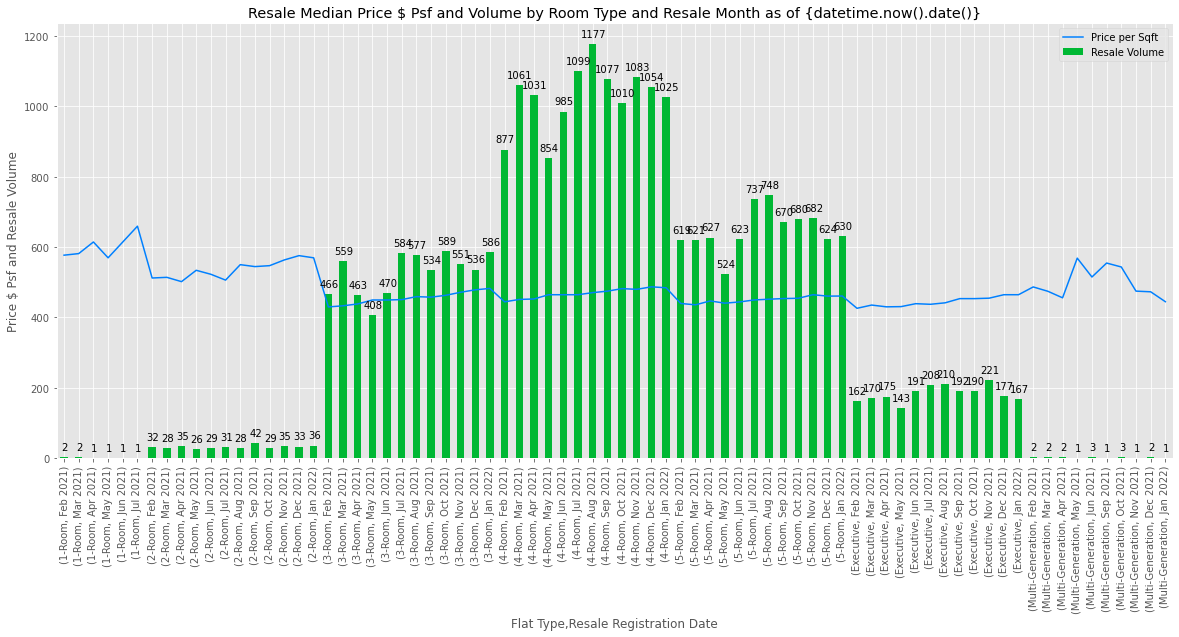

In [57]:
show_median_prices_by_room_type_and_month(hdb)

## Price (Median) per Sqft by Town and Room Type

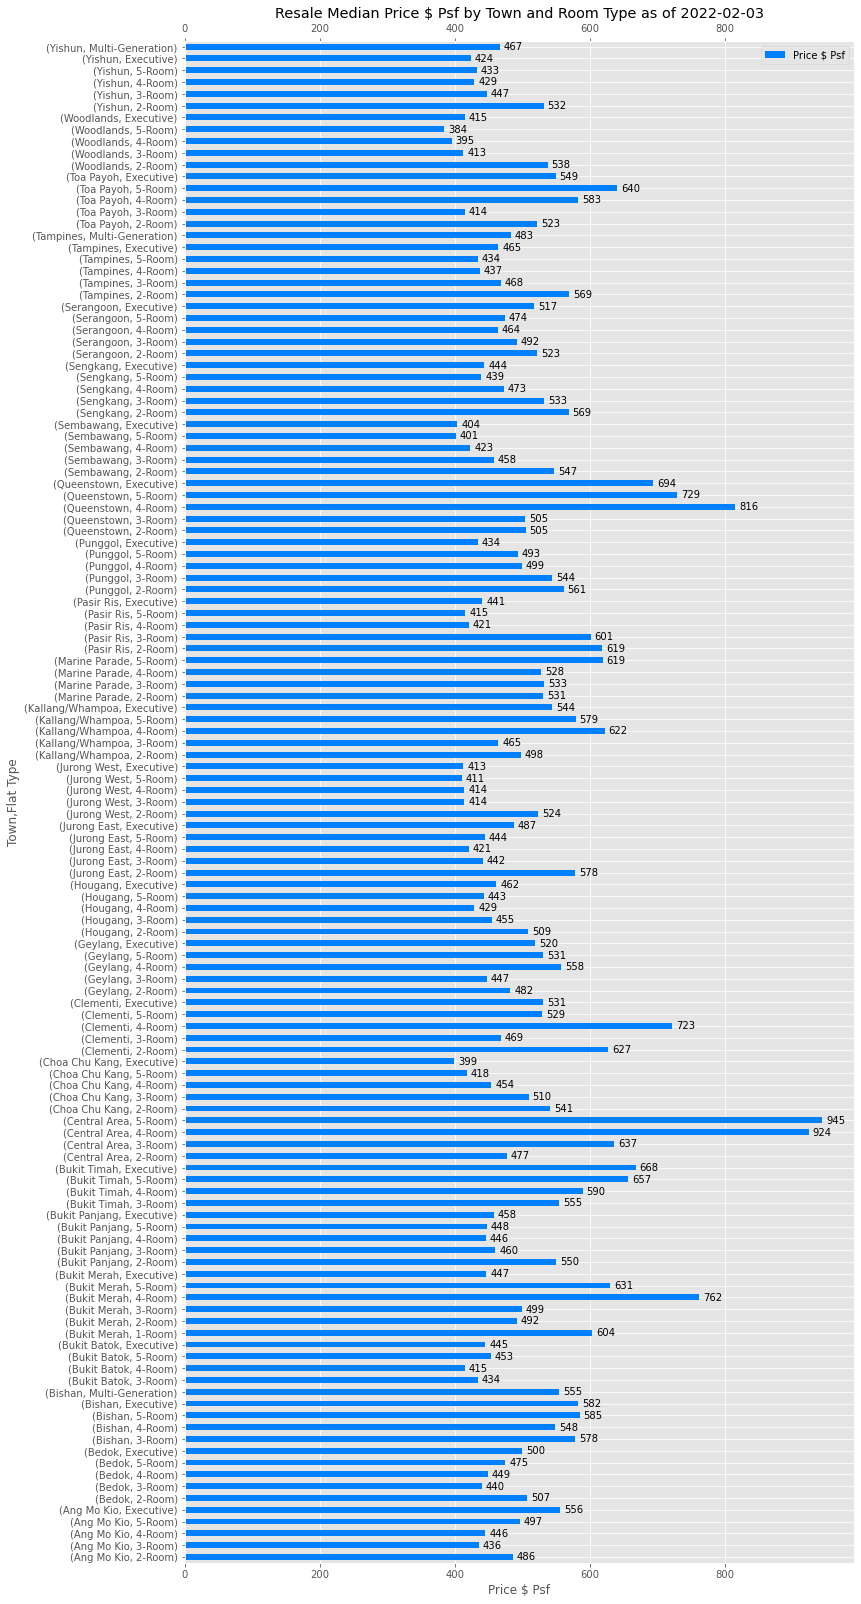

In [59]:
show_median_prices_by_town_and_room_type(hdb)

## Price (Median) per Sqft by Town and Room Type per Remaining Lease Year

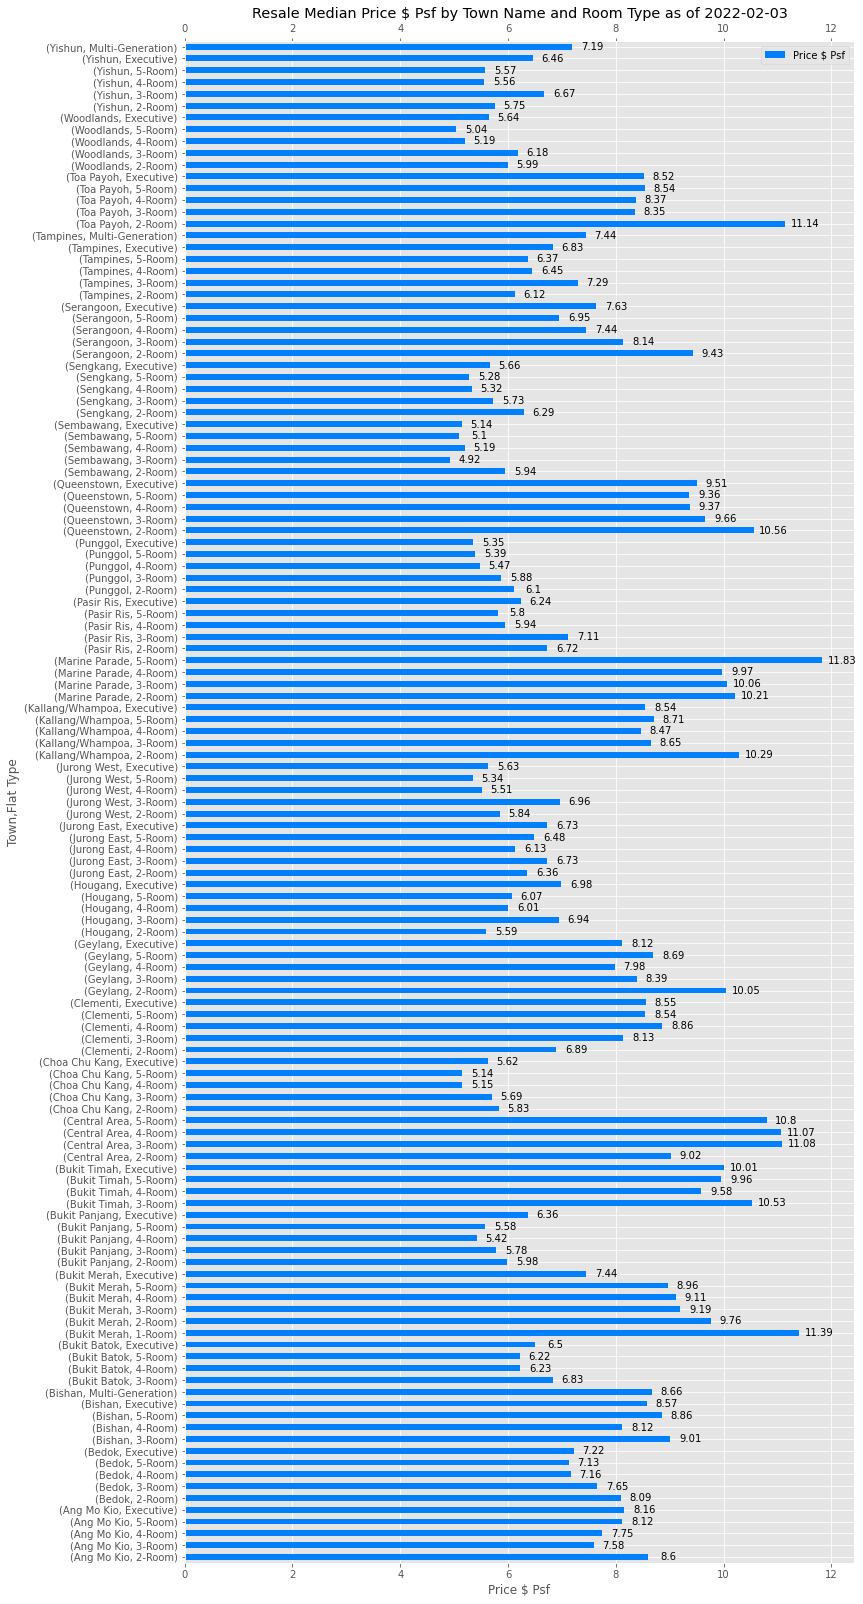

In [63]:
show_median_prices_by_town_and_room_type_per_remaining_lease_year(hdb)

## Remaining Lease Year by Town

E:\Geekout\sg-property-scrapers-and-analysis\scrape-resale-prices\HDB\viz.py:153: UserWarning: FixedFormatter should only be used together with FixedLocator


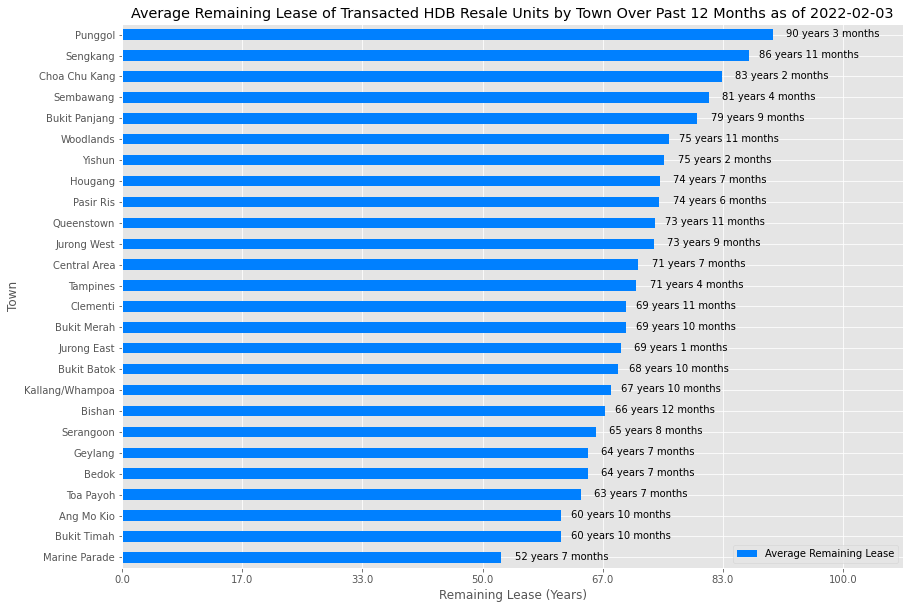

In [65]:
show_remaining_lease_year_by_town(hdb, n_months)

## Psft of HDBs with Lease < 60 years by Town and Room Type

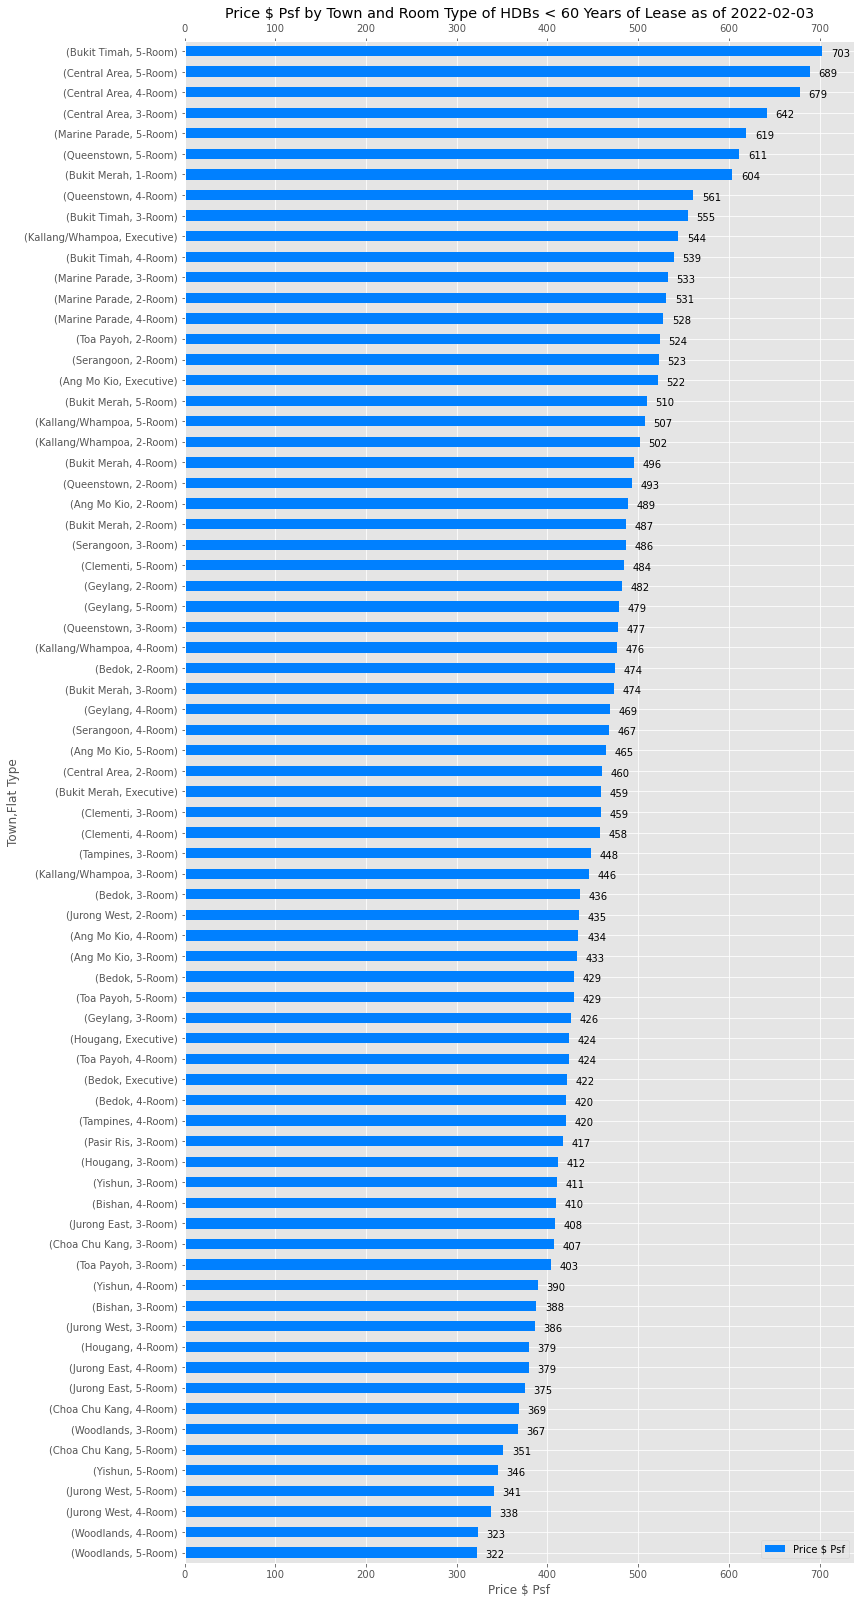

In [67]:
n=60
show_remaining_lease_year_by_town_for_hdb_older_than_n_age(hdb, n)

## Check Similar Resale HDBs by filtering base on psft per remaining lease year and max price

In [23]:
v = 8.5 # psft per remaining lease year
p = 800000 # max price

In [24]:
result = hdb[(hdb['Price per Sqft per Remaining Lease year']>=v-0.5)&\
            ~(hdb['Flat Type'].isin(['1-Room','2-Room','3-Room']))&(hdb.Sqm>100)&(hdb.Price<p)]
print(result.shape)
result.sort_values(by=['Town','Flat Type','Price per Sqft per Remaining Lease year'])

(524, 28)


,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending),Price per Sqft Rank,Price per Sqft Rank (Descending)
911,AMK,Ang Mo Kio,545,Ang Mo Kio Ave 10,22 to 24,118.00Improved,118.0,Improved,5-Room,1981,58 years 10 months,590000.0,Apr 2021,Apr,2021,58,0,696,118.0,1270.152,5000.000000,464.511334,8.008816,22 to 24 5-Room,2195.5,4850.5,2195.5,4850.5
939,AMK,Ang Mo Kio,596A,Ang Mo Kio St 52,04 to 06,110.00Improved,110.0,Improved,5-Room,2002,80 years 9 months,760000.0,Mar 2021,Mar,2021,80,0,960,110.0,1184.040,6909.090909,641.870207,8.023378,04 to 06 5-Room,715.0,6331.0,715.0,6331.0
1034,AMK,Ang Mo Kio,316A,Ang Mo Kio St 31,25 to 27,110.00Improved,110.0,Improved,5-Room,2006,84 years 7 months,798000.0,Sep 2020,Sep,2020,84,0,1008,110.0,1184.040,7254.545455,673.963717,8.023378,25 to 27 5-Room,567.5,6478.5,567.5,6478.5
952,AMK,Ang Mo Kio,305,Ang Mo Kio Ave 1,13 to 15,123.00Standard,123.0,Standard,5-Room,1977,55 years 7 months,590000.0,Jan 2021,Jan,2021,55,0,660,123.0,1323.972,4796.747967,445.628760,8.102341,13 to 15 5-Room,2195.5,4850.5,2195.5,4850.5
967,AMK,Ang Mo Kio,102,Ang Mo Kio Ave 3,10 to 12,127.00Improved,127.0,Improved,5-Room,1993,71 years 5 months,790000.0,Dec 2020,Dec,2020,71,0,852,127.0,1367.028,6220.472441,577.895990,8.139380,10 to 12 5-Room,589.5,6456.5,589.5,6456.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,TP,Toa Payoh,238,Lor 1 Toa Payoh,07 to 09,123.00Improved,123.0,Improved,5-Room,1986,64 years 5 months,720000.0,Mar 2021,Mar,2021,64,0,768,123.0,1323.972,5853.658537,543.818147,8.497159,07 to 09 5-Room,945.5,6100.5,945.5,6100.5
23545,TP,Toa Payoh,239,Lor 1 Toa Payoh,19 to 21,123.00Improved,123.0,Improved,5-Room,1986,64 years 8 months,740000.0,Feb 2021,Feb,2021,64,0,768,123.0,1323.972,6016.260163,558.924207,8.733191,19 to 21 5-Room,812.5,6233.5,812.5,6233.5
23544,TP,Toa Payoh,238,Lor 1 Toa Payoh,04 to 06,120.00Improved,120.0,Improved,5-Room,1986,64 years 6 months,730000.0,Feb 2021,Feb,2021,64,0,768,120.0,1291.680,6083.333333,565.155456,8.830554,04 to 06 5-Room,875.5,6170.5,875.5,6170.5
23585,TP,Toa Payoh,121,Potong Pasir Ave 1,13 to 15,134.00Model A,134.0,Model,5-Room,1984,62 years 4 months,795000.0,Jan 2021,Jan,2021,62,0,744,134.0,1442.376,5932.835821,551.173896,8.889902,13 to 15 5-Room,575.0,6471.0,575.0,6471.0


## Analyze HDB Resale Prices of a specific Town

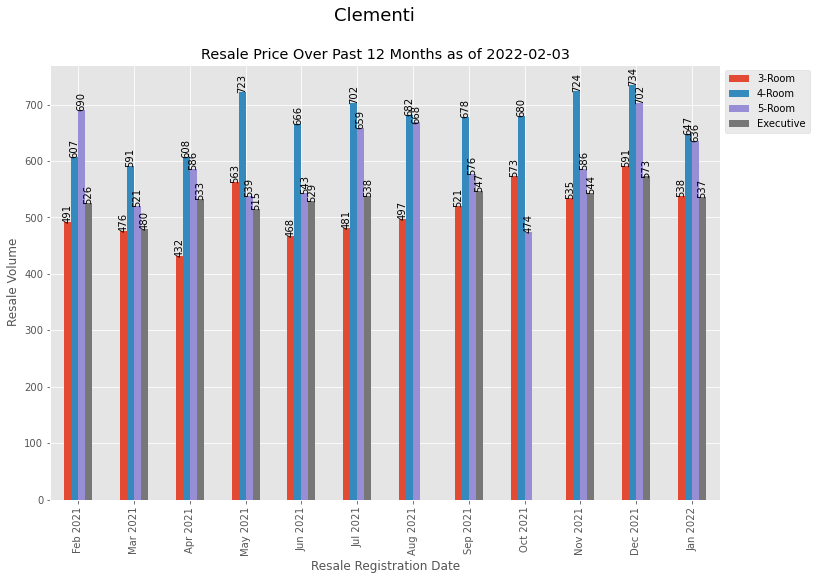

In [69]:
mytown = 'Clementi'
show_past_n_months_mean_psf_of_town(hdb, n_months, mytown)

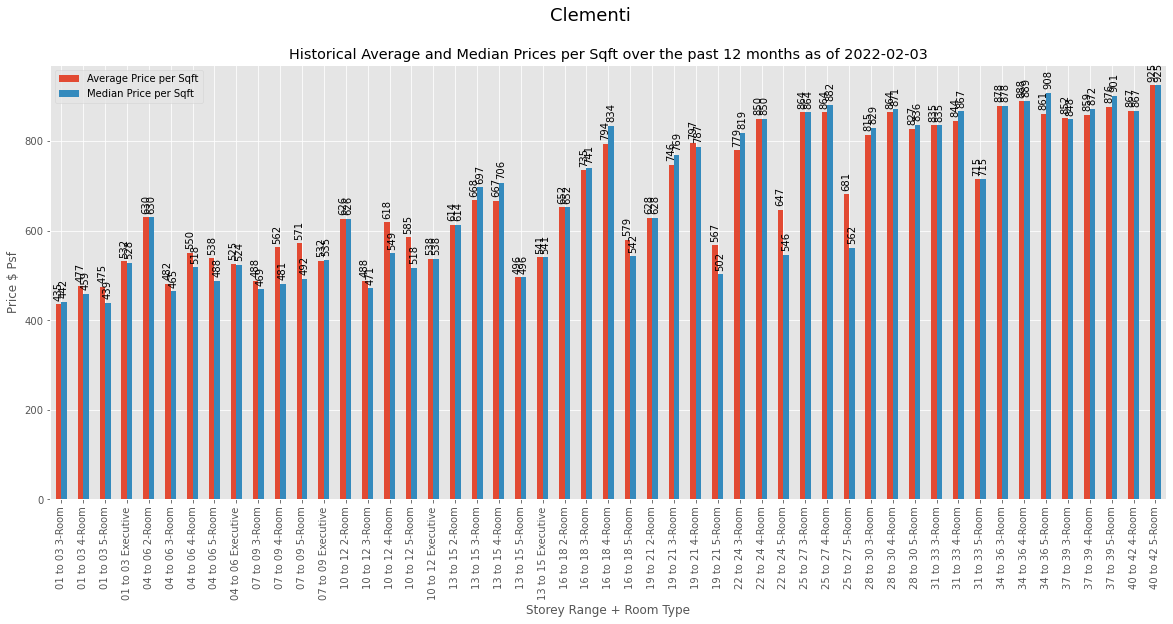

In [76]:
show_past_n_months_mean_psf_by_floor_and_flat_type(hdb, n_months, mytown)

## Analyze HDB Resale Prices By Specific Street

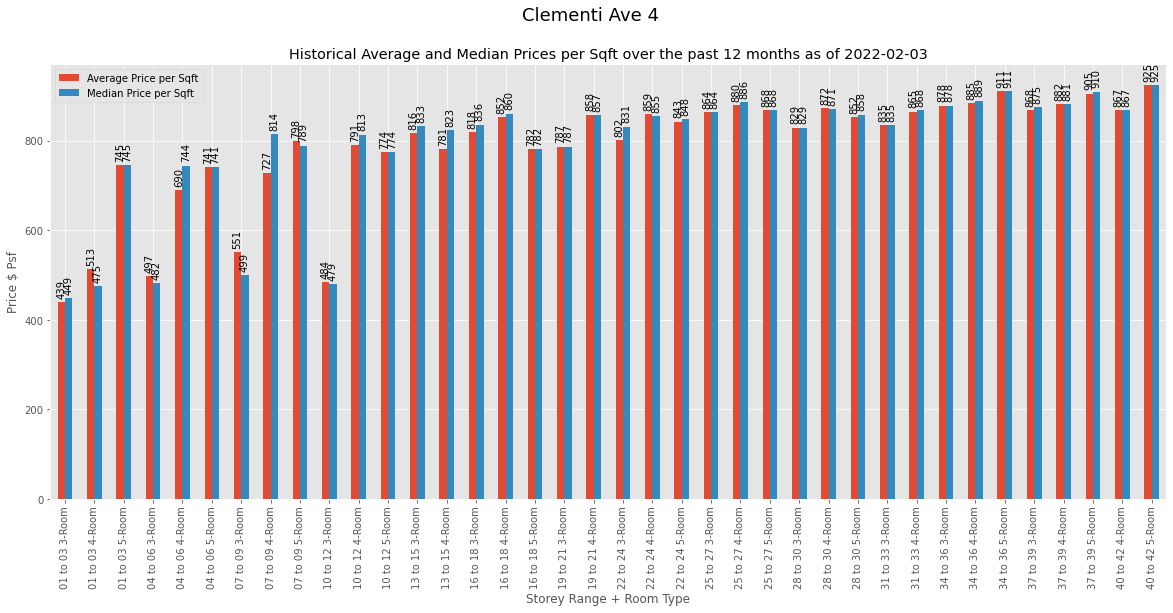

In [77]:
mystreet = "Clementi Ave 4"
show_past_n_months_mean_psf_by_floor_and_flat_type_and_street(hdb, n_months, mystreet)

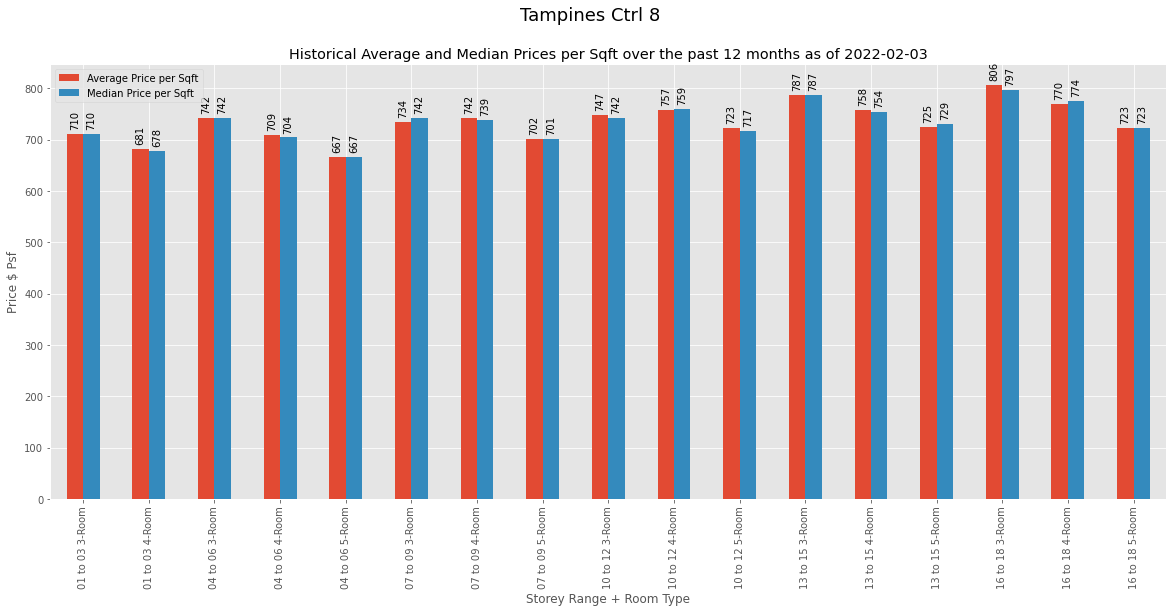

In [78]:
mystreet = 'Tampines Ctrl 8'
show_past_n_months_mean_psf_by_floor_and_flat_type_and_street(hdb, n_months, mystreet)

<a id='DBSS'>DBSS</a>

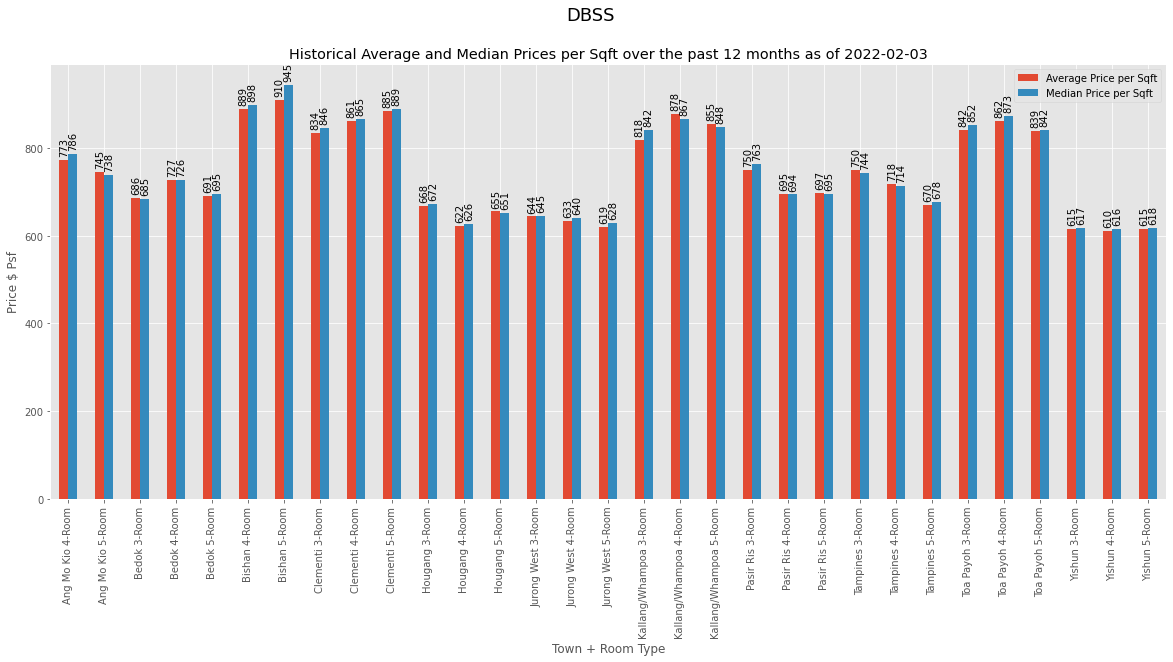

In [85]:
flat_model = 'Dbss'
show_past_n_months_psf_of_flat_model(hdb, n_months, flat_model)

<a id='Newly_MOP_HDB_Units'>Newly MOP HDB Units</a>

In [38]:
mopstreet = 'Teban'
mop = hdb[hdb['Street'].str.contains(mopstreet)&hdb['Block'].isin(['55','56','57'])]

In [39]:
mop.sort_values(by='Remaining Lease in Months', ascending=False)

,Town Code,Town,Block,Street,Storey,Floor Area/Flat Model,Floor Area,Flat Model,Flat Type,Lease Commencement Date,Remaining Lease,Price,Resale Registration Date,Resale Registration Month,Resale Registration Year,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Sqm,Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Flat Type,Price rank room type,Price rank room type (descending),Price per Sqft Rank,Price per Sqft Rank (Descending)
10433,JE,Jurong East,55,Teban Gdns Rd,22 to 24,67.00Model A,67.0,Model,3-Room,2016,95 years 2 months,380000.0,Oct 2020,Oct,2020,95,0,1140,67.0,721.188,5671.641791,526.908379,5.546404,22 to 24 3-Room,899.0,5141.0,899.0,5141.0
10585,JE,Jurong East,56,Teban Gdns Rd,16 to 18,92.00Model A,92.0,Model,4-Room,2016,95 years,470000.0,Dec 2020,Dec,2020,95,0,1140,92.0,990.288,5108.695652,474.609407,4.995888,16 to 18 4-Room,3765.5,7358.5,3765.5,7358.5
10421,JE,Jurong East,57,Teban Gdns Rd,22 to 24,67.00Model A,67.0,Model,3-Room,2016,95 years 1 month,380000.0,Nov 2020,Nov,2020,95,0,1140,67.0,721.188,5671.641791,526.908379,5.546404,22 to 24 3-Room,899.0,5141.0,899.0,5141.0
10420,JE,Jurong East,57,Teban Gdns Rd,04 to 06,67.00Model A,67.0,Model,3-Room,2016,95 years 1 month,338000.0,Nov 2020,Nov,2020,95,0,1140,67.0,721.188,5044.776119,468.671137,4.933380,04 to 06 3-Room,1854.5,4185.5,1854.5,4185.5
10601,JE,Jurong East,55,Teban Gdns Rd,25 to 27,92.00Model A,92.0,Model,4-Room,2016,95 years 1 month,488000.0,Nov 2020,Nov,2020,95,0,1140,92.0,990.288,5304.347826,492.785937,5.187220,25 to 27 4-Room,3165.5,7958.5,3165.5,7958.5
10602,JE,Jurong East,55,Teban Gdns Rd,34 to 36,92.00Model A,92.0,Model,4-Room,2016,95 years 1 month,530000.0,Nov 2020,Nov,2020,95,0,1140,92.0,990.288,5760.869565,535.197841,5.633661,34 to 36 4-Room,2244.0,8880.0,2244.0,8880.0
10603,JE,Jurong East,56,Teban Gdns Rd,10 to 12,92.00Model A,92.0,Model,4-Room,2016,95 years 1 month,440000.0,Nov 2020,Nov,2020,95,0,1140,92.0,990.288,4782.608696,444.315189,4.677002,10 to 12 4-Room,5217.5,5906.5,5217.5,5906.5
10604,JE,Jurong East,56,Teban Gdns Rd,07 to 09,92.00Model A,92.0,Model,4-Room,2016,95 years 1 month,440000.0,Nov 2020,Nov,2020,95,0,1140,92.0,990.288,4782.608696,444.315189,4.677002,07 to 09 4-Room,5217.5,5906.5,5217.5,5906.5
10408,JE,Jurong East,57,Teban Gdns Rd,31 to 33,67.00Model A,67.0,Model,3-Room,2016,95 years,400000.0,Dec 2020,Dec,2020,95,0,1140,67.0,721.188,5970.149254,554.640399,5.838320,31 to 33 3-Room,651.0,5389.0,651.0,5389.0
10407,JE,Jurong East,57,Teban Gdns Rd,22 to 24,67.00Model A,67.0,Model,3-Room,2016,95 years,390000.0,Dec 2020,Dec,2020,95,0,1140,67.0,721.188,5820.895522,540.774389,5.692362,22 to 24 3-Room,757.0,5283.0,757.0,5283.0
